In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import os, fnmatch
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures 
import seaborn as sns
%matplotlib inline
from keras.layers import Input, Dense
from keras.models import Model
# from keras.op
from keras import optimizers
from keras import regularizers
from PIL import Image
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
import os
import pickle
import numpy as np

Using TensorFlow backend.


In [2]:
class_train = "./Class/pw_8bit/"
class_test = "./Class/Test/pw_8bit/"
data_train = []
listOfFiles = os.listdir(class_train)
pattern = "*.tiff"
for entry in listOfFiles:
    if fnmatch.fnmatch(entry, pattern):
            data_train.append(class_train+entry)

In [3]:
len(data_train)

18771

In [4]:
data_test = []
listOfFiles = os.listdir(class_test)
pattern = "*.tiff"
for entry in listOfFiles:
    if fnmatch.fnmatch(entry, pattern):
            data_test.append(class_test+entry)

In [5]:
len(data_test)

2308

In [6]:
data_test

['./Class/Test/pw_8bit/C~C.tiff',
 './Class/Test/pw_8bit/C~C_0_100.tiff',
 './Class/Test/pw_8bit/C~C_0_1161.tiff',
 './Class/Test/pw_8bit/C~C_0_1163.tiff',
 './Class/Test/pw_8bit/C~C_0_1198.tiff',
 './Class/Test/pw_8bit/C~C_0_1205.tiff',
 './Class/Test/pw_8bit/C~C_0_1233.tiff',
 './Class/Test/pw_8bit/C~C_0_1236.tiff',
 './Class/Test/pw_8bit/C~C_0_1305.tiff',
 './Class/Test/pw_8bit/C~C_0_1345.tiff',
 './Class/Test/pw_8bit/C~C_0_156.tiff',
 './Class/Test/pw_8bit/C~C_0_1563.tiff',
 './Class/Test/pw_8bit/C~C_0_1762.tiff',
 './Class/Test/pw_8bit/C~C_0_1862.tiff',
 './Class/Test/pw_8bit/C~C_0_1883.tiff',
 './Class/Test/pw_8bit/C~C_0_1914.tiff',
 './Class/Test/pw_8bit/C~C_0_1957.tiff',
 './Class/Test/pw_8bit/C~C_0_2009.tiff',
 './Class/Test/pw_8bit/C~C_0_2034.tiff',
 './Class/Test/pw_8bit/C~C_0_2114.tiff',
 './Class/Test/pw_8bit/C~C_0_2176.tiff',
 './Class/Test/pw_8bit/C~C_0_2274.tiff',
 './Class/Test/pw_8bit/C~C_0_2313.tiff',
 './Class/Test/pw_8bit/C~C_0_2360.tiff',
 './Class/Test/pw_8bit/C~

In [7]:
data_train_list = []
for i in range(len(data_train)):
    arr_obj = []
    cl = (data_train[i].split("/")[3]).split("~")[0]
    if cl == "WD" or cl == "Sy1" or cl == "cv" or cl == "QSO" : continue
    arr_obj.append(cl)
    arr_obj.append(data_train[i])
    data_train_list.append(arr_obj)

In [8]:
data_test_list = []
for i in range(len(data_test)):
    arr_obj = []
    cl = (data_test[i].split("/")[4]).split("~")[0]
    if cl == "WD" or cl == "Sy1" or cl == "cv" or cl == "QSO" : continue
    arr_obj.append(cl)
    arr_obj.append(data_test[i])
    data_test_list.append(arr_obj)

In [9]:
print(len(data_train_list), len(data_test_list))

17871 1998


In [10]:
df_train = pd.DataFrame(data_train_list)
df_test = pd.DataFrame(data_test_list)

In [11]:
df_train.head()

,0,1
0,C,./Class/pw_8bit/C~0445+0107.tiff
1,C,./Class/pw_8bit/C~0445+0107_0_1059.tiff
2,C,./Class/pw_8bit/C~0445+0107_0_1081.tiff
3,C,./Class/pw_8bit/C~0445+0107_0_1146.tiff
4,C,./Class/pw_8bit/C~0445+0107_0_1495.tiff


In [12]:
df_test.head()

,0,1
0,C,./Class/Test/pw_8bit/C~C.tiff
1,C,./Class/Test/pw_8bit/C~C_0_100.tiff
2,C,./Class/Test/pw_8bit/C~C_0_1161.tiff
3,C,./Class/Test/pw_8bit/C~C_0_1163.tiff
4,C,./Class/Test/pw_8bit/C~C_0_1198.tiff


In [13]:
df_train[0].value_counts()

Mrk    7847
M      5955
sd     3139
PN      517
C       413
Name: 0, dtype: int64

In [14]:
df_test[0].value_counts()

sd     777
Mrk    600
M      449
C      127
PN      45
Name: 0, dtype: int64

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_train[0])
df_train[0]=le.transform(df_train[0])

In [18]:
df_train[0].value_counts()

2    7847
1    5955
4    3139
3     517
0     413
Name: 0, dtype: int64

In [19]:
for index, Row in df_test.iterrows():
    cl = Row[0]
    if cl == 'Mrk':
        df_test.at[index, 0] = 2
    elif cl == "M":
        df_test.at[index, 0] = 1
    elif cl == "sd":
        df_test.at[index, 0] = 4
    elif cl == "QSO":
        df_test.at[index, 0] = 4
    elif cl == "PN":
        df_test.at[index, 0] = 3
    elif cl == "C":
        df_test.at[index, 0] = 0

In [20]:
df_test[0].value_counts()

4    777
2    600
1    449
0    127
3     45
Name: 0, dtype: int64

In [21]:
X_tr = df_train.iloc[:, 1]
Y_tr = df_train.iloc[:, 0]
X_tr = X_tr.values
Y_tr = Y_tr.values

X_ts = df_test.iloc[:, 1]
Y_ts = df_test.iloc[:, 0]
X_ts = X_ts.values
Y_ts = Y_ts.values

In [22]:
images_list_train = []
max_width = 0
max_height = 0
ind = 0
for i in range(len(X_tr)):
    im = Image.open(X_tr[i])
    arr = np.array(im)#.flatten()
    
    arr=(arr-arr.min())/(arr.max()-arr.min())
    #arr = arr / 0xffff
    s = arr.shape
    if s[0] > max_height:
        max_height = s[0]
    if s[1] > max_width:
        max_width = s[1]
        ind = i
    images_list_train.append(arr)

In [23]:
images_list_test = []
ind = 0
for i in range(len(X_ts)):
    im = Image.open(X_ts[i])
    arr = np.array(im)#.flatten()
    
    arr=(arr-arr.min())/(arr.max()-arr.min())
    #arr = arr / 0xffff
    s = arr.shape
    if s[0] > max_height:
        max_height = s[0]
    if s[1] > max_width:
        max_width = s[1]
        ind = i
    images_list_test.append(arr)

In [24]:
print(max_width, max_height)

40 140


In [25]:
for i in range(len(images_list_train)):
    s = images_list_train[i].shape
    d_width = (max_width - s[1])
    d_height = (max_height - s[0])
    
    d_top = int(d_height / 2)
    d_bottom = int(d_height - d_top)
    
    d_left = int(d_width / 2)
    d_right = int(d_width - d_left)
    #print(d_top, d_bottom, d_left, d_right)
    
    arr = images_list_train[i]
    for l in range(d_left):
        arr = np.insert(arr, 0, 0, axis = 1)
    
    for r in range(d_right):
        b = np.zeros((s[0],1))
        arr = np.append(arr, b, axis = 1)
    
    for t in range(d_top):
        arr = np.insert(arr, 0, 0, axis = 0)
    
    for b in range(d_bottom):
        b = np.zeros((1, arr.shape[1],))
        arr = np.append(arr, b, axis = 0)
    
    images_list_train[i] = arr.flatten()

In [26]:
for i in range(len(images_list_test)):
    s = images_list_test[i].shape
    d_width = (max_width - s[1])
    d_height = (max_height - s[0])
    
    d_top = int(d_height / 2)
    d_bottom = int(d_height - d_top)
    
    d_left = int(d_width / 2)
    d_right = int(d_width - d_left)
    #print(d_top, d_bottom, d_left, d_right)
    
    arr = images_list_test[i]
    for l in range(d_left):
        arr = np.insert(arr, 0, 0, axis = 1)
    
    for r in range(d_right):
        b = np.zeros((s[0],1))
        arr = np.append(arr, b, axis = 1)
    
    for t in range(d_top):
        arr = np.insert(arr, 0, 0, axis = 0)
    
    for b in range(d_bottom):
        b = np.zeros((1, arr.shape[1],))
        arr = np.append(arr, b, axis = 0)
    
    images_list_test[i] = arr.flatten()

40 140


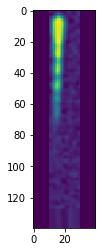

In [27]:
width = max_width
height = max_height
print(width, height)
plt.imshow(images_list_test[13].reshape(140, 40))

In [28]:
from tensorflow.python.client import device_lib
import tensorflow as tf
import keras
#print(device_lib.list_local_devices())

config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 8} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [29]:
images_np_train = np.array(images_list_train)
images_np_test = np.array(images_list_test)

In [30]:
X_train = images_np_train
Y_train = Y_tr
Y_train = keras.utils.to_categorical(Y_train, 5)

X_test = images_np_test
Y_test = Y_ts
Y_test = keras.utils.to_categorical(Y_test, 5)

In [31]:
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (17871, 5600)
17871 train samples
1998 test samples


In [32]:
from keras.regularizers import l2
from keras.regularizers import l1
from keras.layers import Dropout
inpu_dim = X_train.shape[1]
h_1 = 2048
h_2 = 1024
h_3 = 256
h_4 = 256
out_shape = 5

#, kernel_regularizer = keras.regularizers.l1_l2(l1=0.01, l2=0.01)

input_vect = Input(shape = (inpu_dim,))
x = BatchNormalization()(input_vect)
x = Dropout(0.3)(x)
x = Dense(h_1, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(h_2, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(h_3, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
#x = Dense(h_4, activation="relu", kernel_regularizer = keras.regularizers.l1_l2(l1=0.01, l2=0.01))(x)
#x = BatchNormalization()(x)
#x = Dropout(0.3)(x)
out_layer = Dense(out_shape, activation='softmax')(x)

model = Model(input_vect, out_layer)




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 5600)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 5600)              22400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 5600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              11470848  
_________________________________________________________________
batch_normalization_2 (Batch (None, 2048)              8192      
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
__________

In [34]:
adadelta = optimizers.Adadelta(lr=0.05, rho=0.95)
model.compile(optimizer=adadelta , loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cw = {0:1, 1:1, 2:1, 3:1, 4:1, 5:1}
history = model.fit(X_train, Y_train, epochs = 25, batch_size = 64, shuffle=True, validation_data=(X_test, Y_test), class_weight=cw)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 17871 samples, validate on 1998 samples
Epoch 1/25




17871/17871 [==============================] - 19s 1ms/step - loss: 1.1084 - acc: 0.6489 - val_loss: 0.9629 - val_acc: 0.7197
Epoch 2/25
17871/17871 [==============================] - 16s 906us/step - loss: 0.7350 - acc: 0.7684 - val_loss: 0.8232 - val_acc: 0.7482
Epoch 3/25
17871/17871 [==============================] - 16s 917us/step - loss: 0.6109 - acc: 0.8037 - val_loss: 0.7975 - val_acc: 0.7608
Epoch 4/25
17871/17871 [==============================] - 17s 934us/step - loss: 0.5505 - acc: 0.8198 - val_loss: 0.7414 - val_acc: 0.7773
Epoch 5/25
17871/17871 [==============================] - 16s 920us/step - loss: 0.4985 - acc: 0.8349 - val_loss: 0.7500 - val_acc: 0.7693
Epoch 6/25
17871/17871 [==============================] - 17s 928us/step - loss: 0.4535 - acc: 0.8481 - val_loss: 0.7191 - val_acc: 0.7743
Epoch 7/25
17871/17

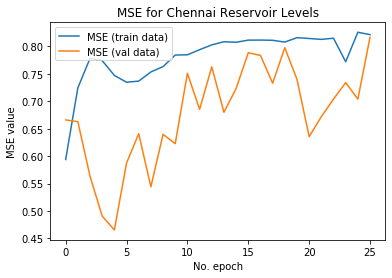

In [41]:
plt.plot(history.history['acc'], label='MSE (train data)')
plt.plot(history.history['val_acc'], label='MSE (val data)')
plt.title('MSE for Chennai Reservoir Levels')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

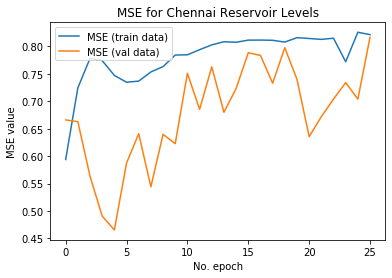

In [42]:
plt.plot(history.history['acc'], label='MSE (train data)')
plt.plot(history.history['val_acc'], label='MSE (val data)')
plt.title('MSE for Chennai Reservoir Levels')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [43]:
prediction = model.predict(X_test)

In [44]:
for i in range(len(prediction)):
    prediction[i] = prediction[i] > 0.5

In [45]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

print('Accuracy:', accuracy_score(Y_test, prediction))
print ('F1 score:', f1_score(Y_test, prediction, average = "weighted"))
print ('Recall:', recall_score(Y_test, prediction, average = "weighted"))
print ('Precision:', precision_score(Y_test, prediction, average = "weighted"))
print ('\n clasification report:\n', classification_report(Y_test,prediction))
print ('\n confussion matrix:\n',confusion_matrix(Y_test, prediction))

Accuracy: 0.7856761090326029
F1 score: 0.8152007006433191
Recall: 0.7856761090326029
Precision: 0.8602094783965292

 clasification report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83       449
           1       0.79      0.80      0.79       600
           2       1.00      0.87      0.93        45
           3       0.95      0.72      0.82       777
           4       0.00      0.00      0.00         0

   micro avg       0.85      0.79      0.82      1871
   macro avg       0.70      0.65      0.67      1871
weighted avg       0.86      0.79      0.82      1871
 samples avg       0.79      0.79      0.79      1871



C:\Users\Ghevond\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ghevond\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ghevond\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ghevond\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ghevond\Anaconda3\lib\site-packages\sklearn\metrics\classification.p

ValueError: multilabel-indicator is not supported